### Boombike Prediction
#### ( Simple Linear Regression)

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("day (1).csv")

-season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)

In [3]:

df["yr"] = np.where(df["yr"] == 0, 2018, 2019)


## Data Inspection

In [4]:
# data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [6]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [8]:
df["season"].head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    2
96    2
97    2
98    2
99    2
Name: season, Length: 100, dtype: int64

In [9]:
#Type casting the datetime and numerical attributes to category
df['season']=df.season.astype('category') # categorical conversion
df['yr']=df.yr.astype('category')
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [10]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
#diffrent value counts in each categorical features
categorical_col = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']
end='\n'+'*'*10+'\n' # end line seperator

for col in categorical_col:
    print(col,':\n',df[col].value_counts(),end=end)
# listing frequency of each value for all of the categorical features

season :
 season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
**********
yr :
 yr
2018    365
2019    365
Name: count, dtype: int64
**********
mnth :
 mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64
**********
holiday :
 holiday
0    709
1     21
Name: count, dtype: int64
**********
weekday :
 weekday
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
**********
workingday :
 workingday
1    499
0    231
Name: count, dtype: int64
**********
weathersit :
 weathersit
1    463
2    246
3     21
Name: count, dtype: int64
**********


In [12]:
df.shape


(730, 16)

In [13]:
# Holiday wise yearly count of bike rental
df[['season','yr', 'cnt', 'holiday']].groupby([ 'yr', 'holiday']).count()


season  cnt
yr   holiday             
2018 0           355  355
     1            10   10
2019 0           354  354
     1            11   11

In [14]:
# weather condition wise  count of bike rental
df[['weathersit', 'cnt']].groupby(['weathersit']).count()

,cnt
weathersit,
1,463
2,246
3,21


In [15]:
df[['weathersit', 'cnt']].groupby(['weathersit']).mean().round().astype(int)


,cnt
weathersit,
1,4877
2,4045
3,1803


In [16]:
# missing value checking
print('Number of missing values:\n',df.isnull().sum())

#  description 
df.describe()

Number of missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
num_cols=['instant', 
        'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'] 
cat_cols=['holiday', 'weekday','yr','workingday', 'mnth', 'weathersit','season']


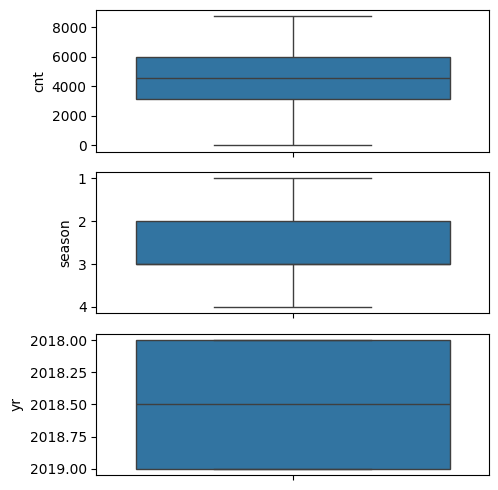

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['cnt'], ax = axs[0])
plt2 = sns.boxplot(df['season'], ax = axs[1])
plt3 = sns.boxplot(df['yr'], ax = axs[2])
plt.tight_layout()

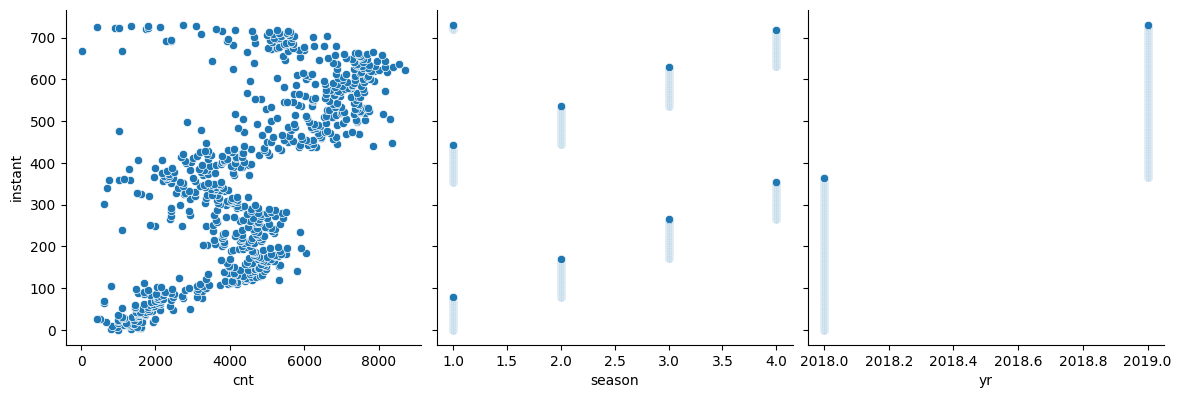

In [19]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['cnt', 'season', 'yr'], y_vars='instant', height=4, aspect=1, kind='scatter')
plt.show()

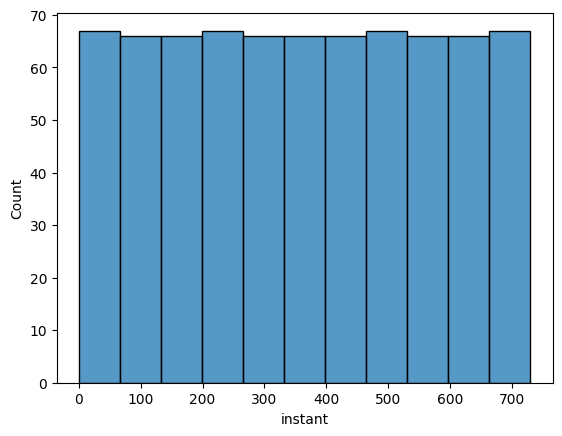

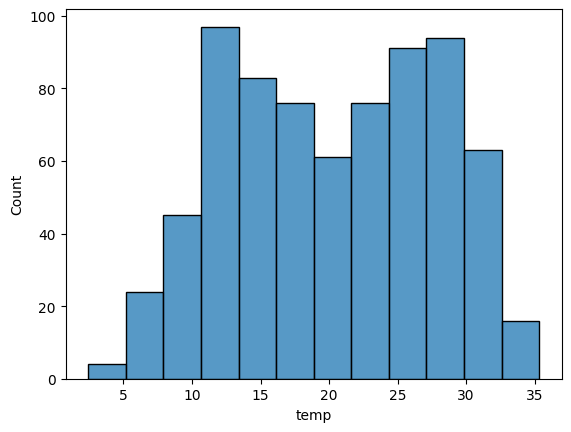

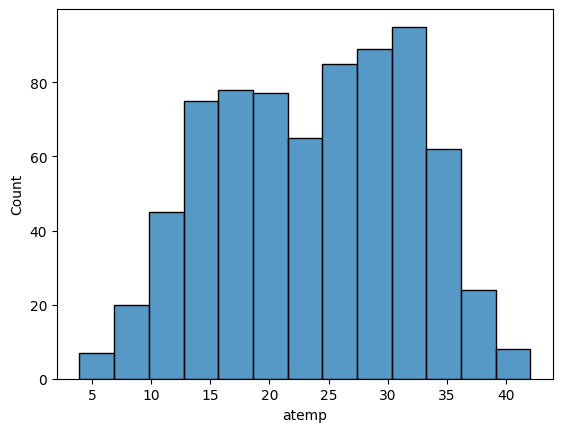

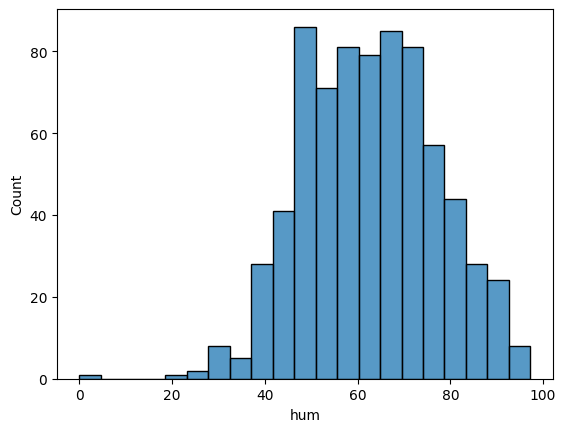

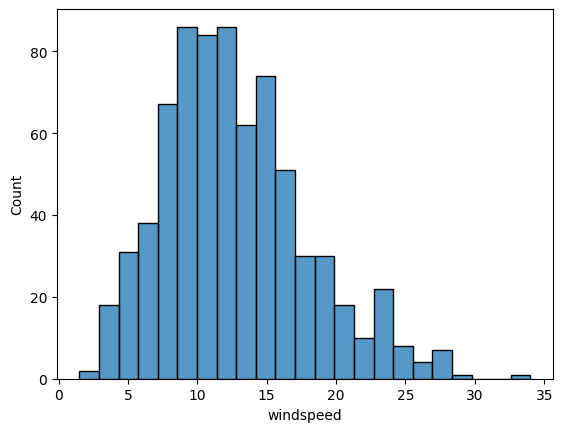

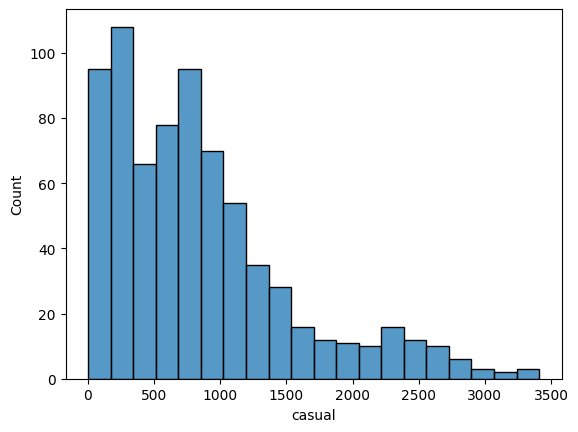

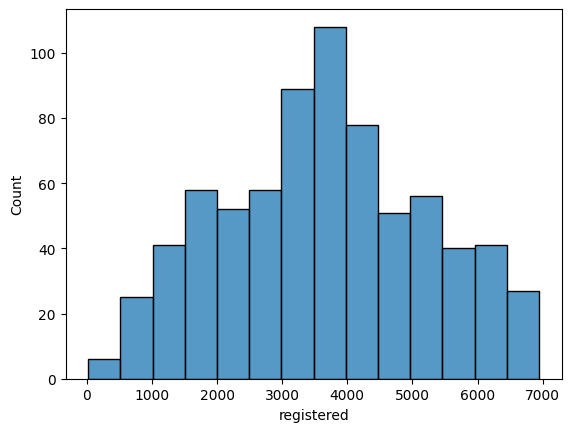

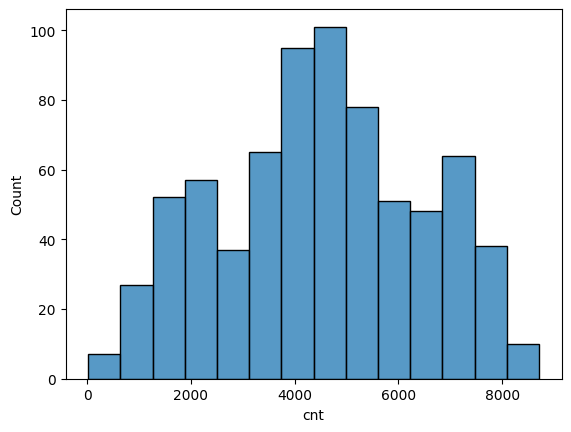

In [20]:
# univariate Analysis
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

#### More deep understanding 

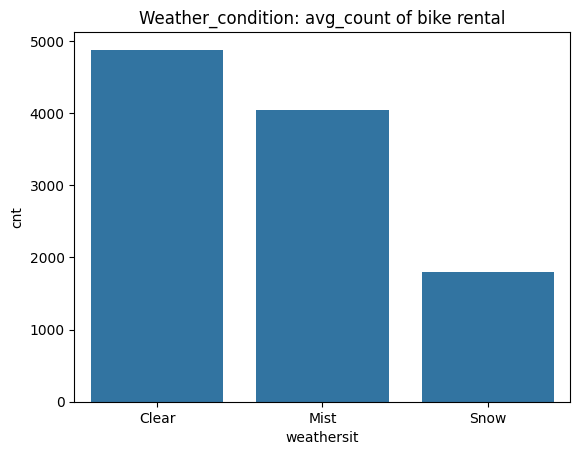

In [21]:
# weather condition wise  avg_count of bike rental
ax = sns.barplot(x='weathersit',y='cnt',data=df, ci=None)
ax.set_title("Weather_condition: avg_count of bike rental") # set title
ax.set_xticklabels(['Clear', 'Mist', 'Snow']) # set x-tick labels
plt.show()

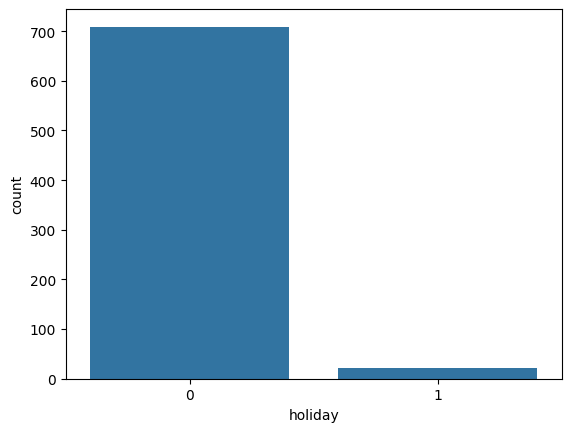

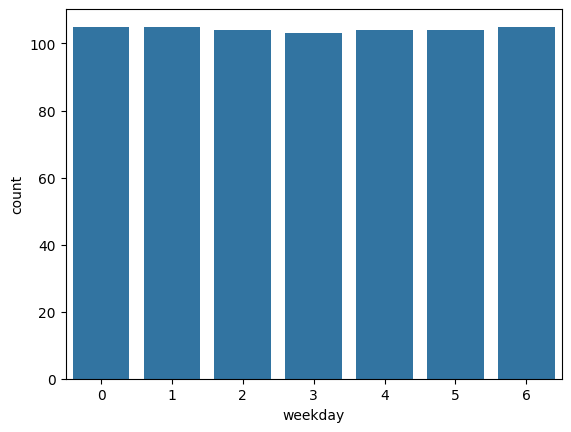

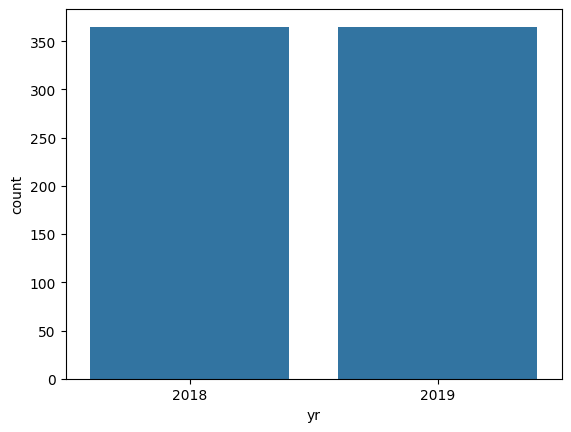

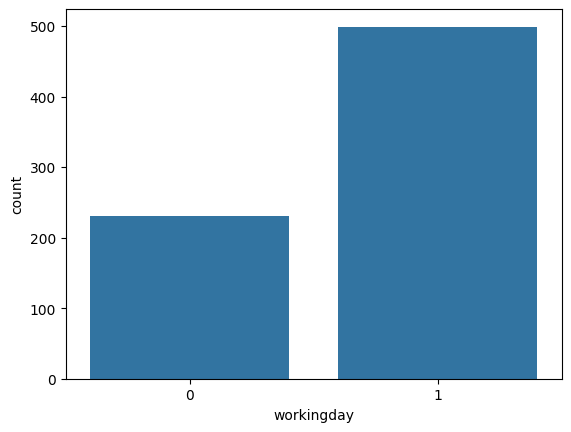

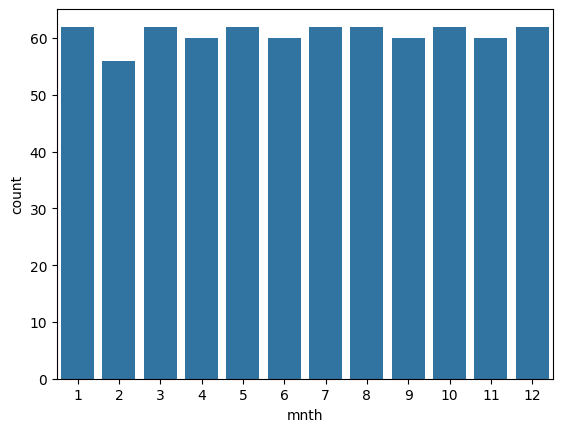

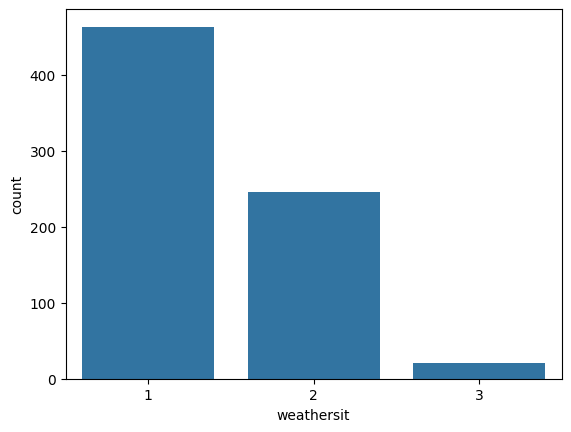

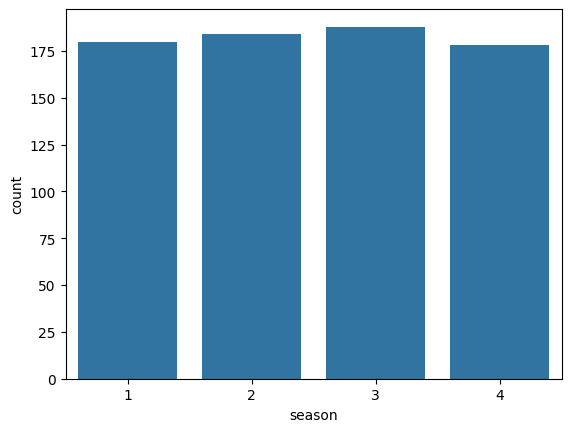

In [22]:


for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()
   

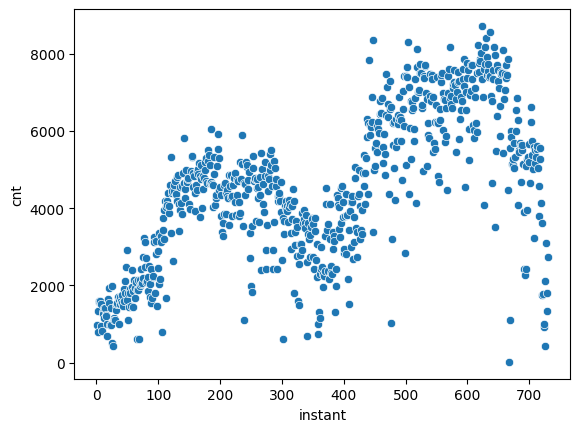

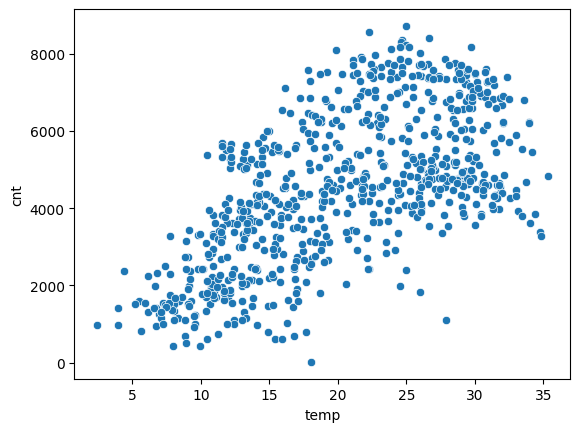

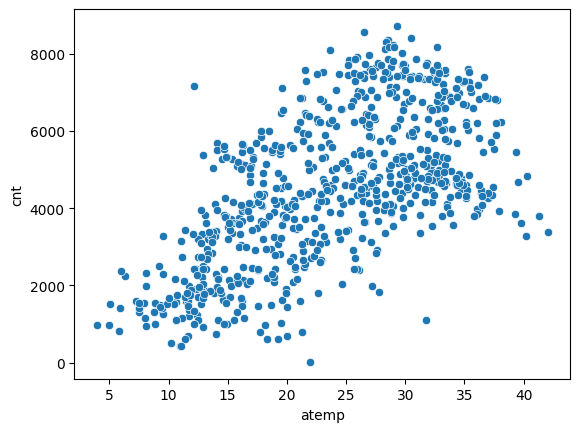

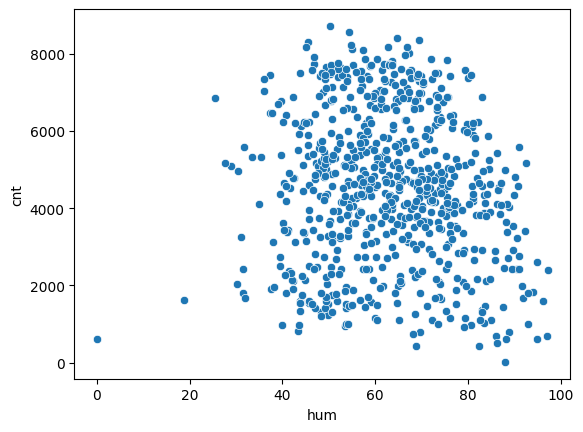

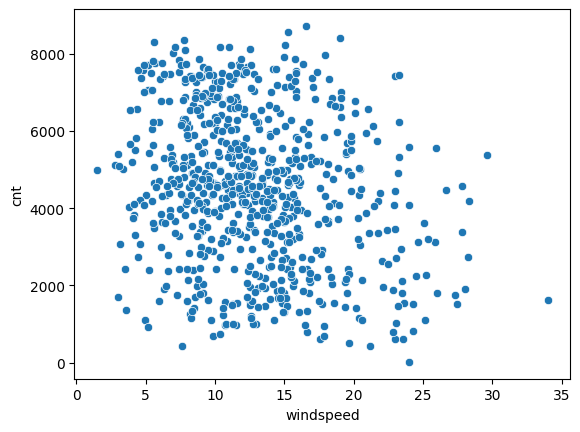

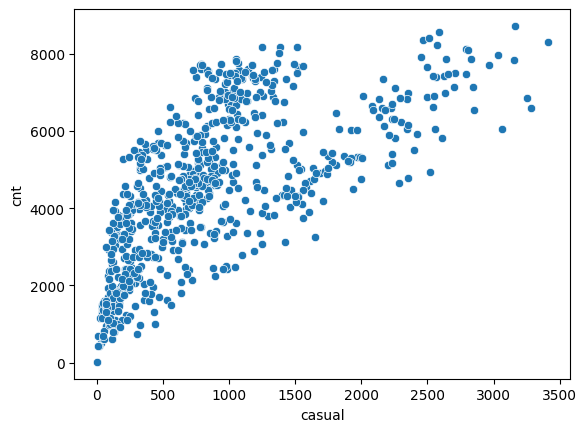

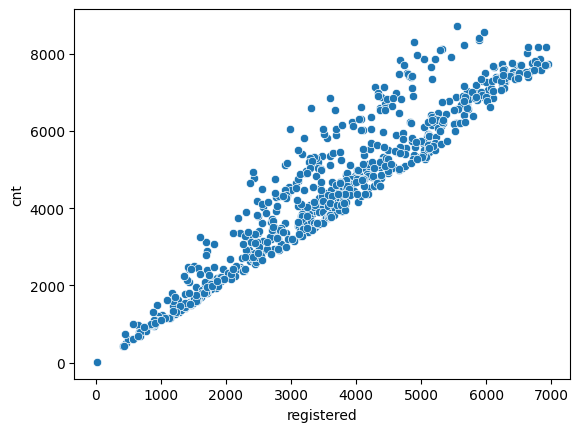

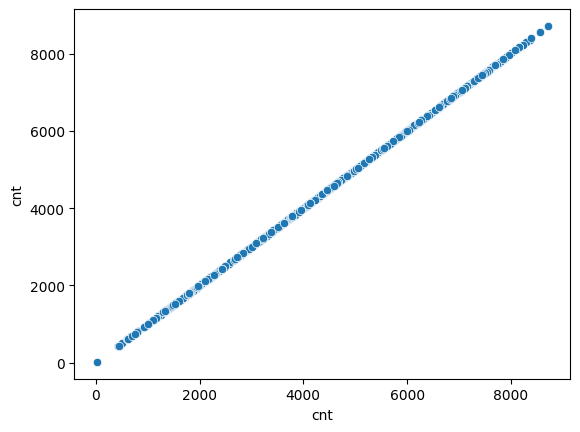

In [23]:
# Bivariate Analysis
# sns.pairplot(df(num_cols])
# plot.show()

for i in num_cols:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

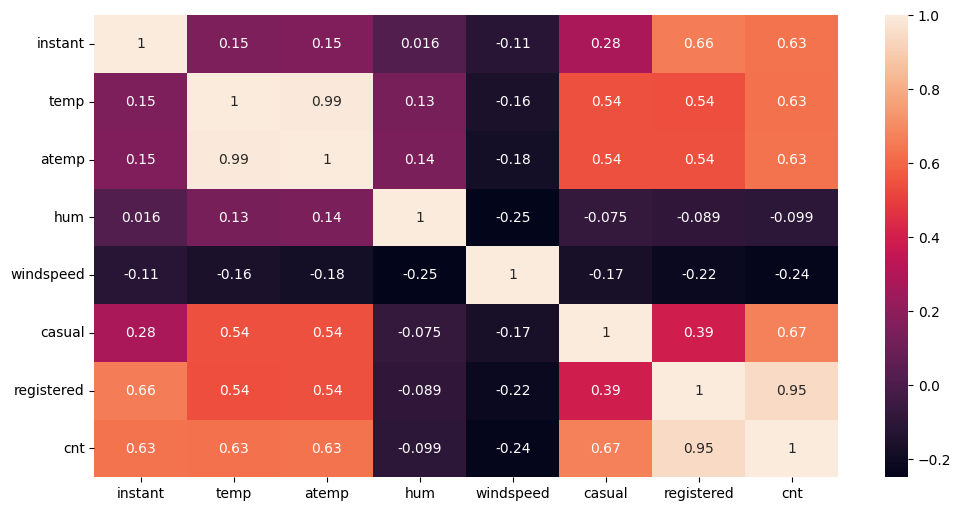

In [24]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

In [25]:
df[cat_cols].nunique()

holiday        2
weekday        7
yr             2
workingday     2
mnth          12
weathersit     3
season         4
dtype: int64

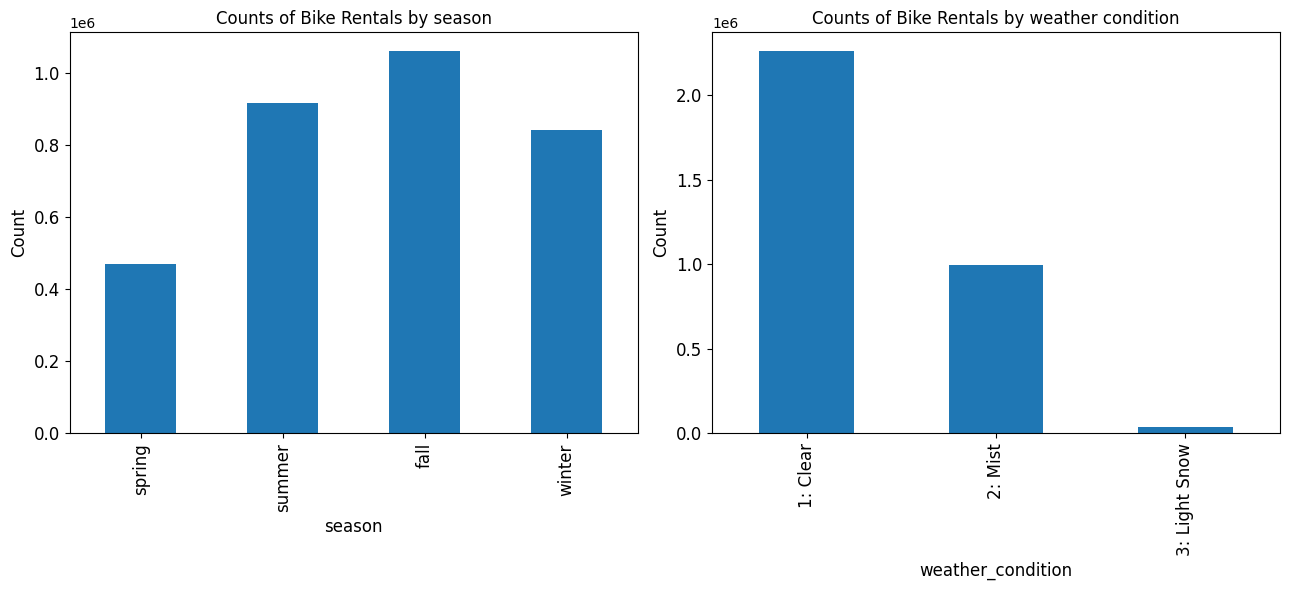

In [26]:
f, (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6)) # 1 row 2 column subplot 

# Counts of Bike Rentals by season
ax1 = df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',legend = False, title ="Counts of Bike Rentals by season", stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)  # set x-axis labels
ax1.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax1.set_xticklabels(['spring','summer','fall','winter'])  # set x-tick labels

# Counts of Bike Rentals by weather condition 
ax2 = df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar', legend = False, stacked=True, title ="Counts of Bike Rentals by weather condition", fontsize=12, ax=ax2)
ax2.set_xlabel("weather_condition", fontsize=12)  # set x-axis labels
ax2.set_ylabel("Count", fontsize=12)  # set y-axis labels
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow'])  # set x-tick labels

f.tight_layout()

Text(0.5, 1.0, 'Count of bike on workingdays/holidays for each season')

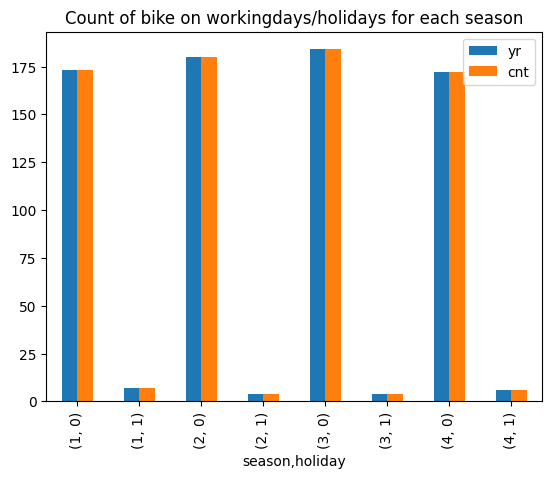

In [27]:
# Count of bike on workingdays/holidays for each season
df[['season','yr', 'cnt', 'holiday']].groupby(['season',  'holiday']).count().plot(kind='bar') # plotting bar graph
plt.title('Count of bike on workingdays/holidays for each season') # set title

[Text(0, 0, '2018'), Text(1, 0, '2019')]

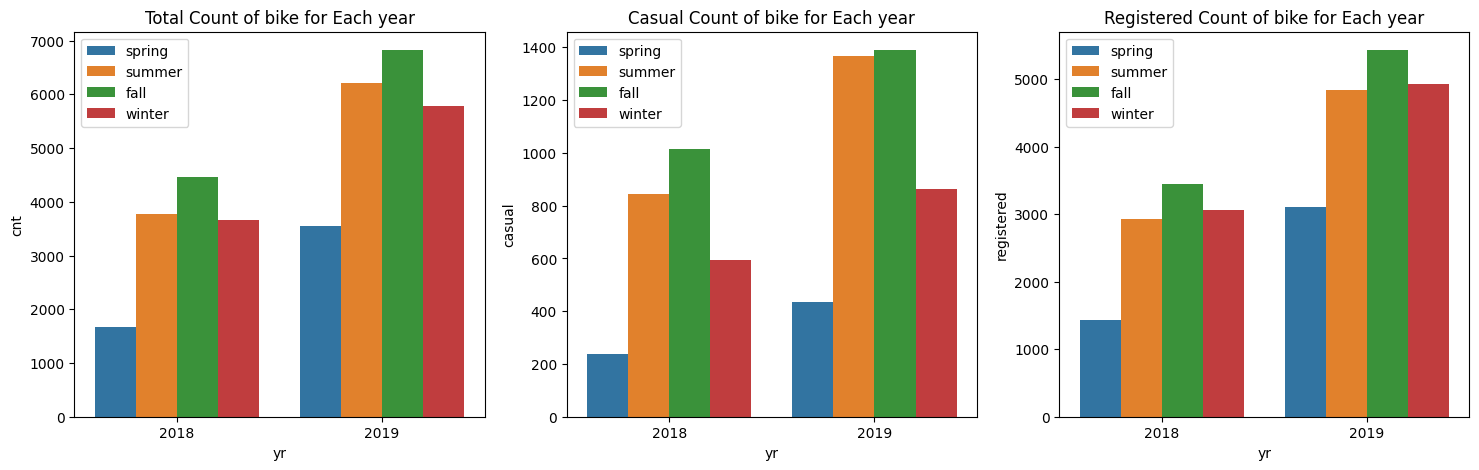

In [28]:
fig, (axs1,axs2,axs3) = plt.subplots(ncols=3, figsize=(18,5))  # 1 row 3 column subplot

# Total Count of bike for Each year
sns.barplot(x='yr', y='cnt', data=df, hue='season', ax=axs1, ci=None) # barplot
axs1.set_title('Total Count of bike for Each year') # set tilte
axs1.legend(['spring','summer','fall','winter']) # set legend
axs3.set_xticklabels(['2018', '2019']) # set x-tick label

# Casual Count of bike for Each year
sns.barplot(x='yr', y='casual', data=df, hue='season', ax=axs2, ci=None) # barplot
axs2.set_title('Casual Count of bike for Each year') # set title
axs2.legend(['spring','summer','fall','winter']) # set legend
axs3.set_xticklabels(['2018', '2019']) # set x-tick label

# Registered Count of bike for Each year
sns.barplot(x='yr', y='registered', data=df, hue='season', ax=axs3, ci=None) # barplot
axs3.set_title('Registered Count of bike for Each year') # set title
axs3.legend(['spring','summer','fall','winter']) # set legend
axs3.set_xticklabels(['2018', '2019']) # set x-tick label

 # Dummy Variable Creation one hot encoding
### Wherever we have more than 2 categories in categorical features, we need to create dummies for them
Converting categorical features to numercial features to feed our models 

In [29]:
dummy_data = df.copy()

# fucntion for creating dummy features
def get_dummy(df, col):
    df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
    # create dummy features and dropping first feature, since it's redundant
    df = df.drop([col], axis = 1)                                                      # drop feature of which dummy is created
    return df                                                                          # return dummy dataframe

# features to create dummy
get_dummy_features = categorical_features

# create dummy for features
for col in get_dummy_features:
    dummy_data = get_dummy(dummy_data, col) # create dummy for all categorical features
    
dummy_data.head()

NameError: name 'categorical_features' is not defined

In [ ]:
dummy_data.info()


In [ ]:
df1=pd.concat([df,dum],axis=1)
df1.head()

In [ ]:
# splitting data in test and train set
X_train, X_test, y_train, y_test = train_test_split(df1.drop(['cnt'], axis=1),df1.cnt,test_size=0.25,random_state=14)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


## Train-test split

In [ ]:
df1.shape

In [ ]:
df1.columns=df1.columns.astype(str)

In [ ]:
X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)X_test
X_test=scaler.transform(X_test)
# as test data is unseen data we can`t fit on it


In [ ]:
X_test

In [ ]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)

X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [ ]:
X_train_df.head(2)

2# feature selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [ ]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=5)

In [ ]:
selector=selector.fit(X_train_df,y_train)
selector.support_

In [ ]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
## Modelling

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [ ]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

# accepetable Range for p-value is <0.05
# Acceptable Range for VIF is <5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i)
                 for i in range(len(X_train_sm.columns))]
vif_data

# Linear Regressioin Model (line of best fit)
y=2.0015*NOX+2.8567*RM-2.3662*DIS-2.1842*PTRATIO-4.0517*LSTAT+22.6210

In [ ]:
X_train_sm.columns